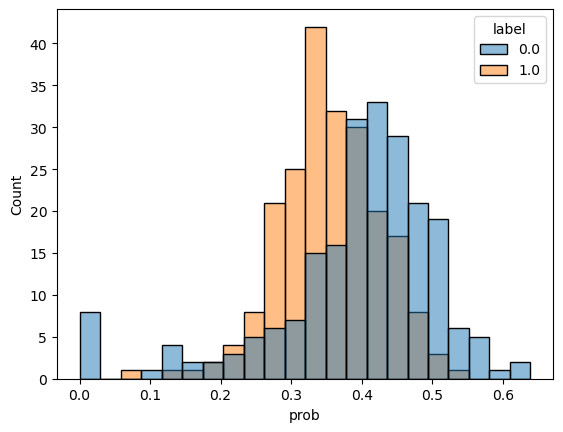

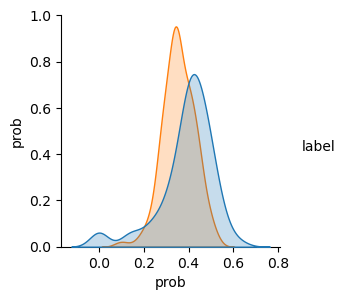

In [47]:
import json
def load_processed_code_from_file(input_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        return json.load(file)
    
def save_list_to_json(data, filename):
    with open(filename, 'w', encoding='utf-8') as file:
        json.dump(data, file, indent=4)
import numpy as np
import pandas as pd


#data processing
def split(data):
    M = len(data[-1])
    N = len(data) - M
    data_ori = []
    data_per = []
    for i in range(M):
        data_ori.append(data[i])
    for j in range(M):
        data_ = []
        for i in range(M, M+N):
                data_.append(data[i][j])
        data_per.append(data_)
    return data_ori, data_per

#GPT_generated original and perturbed data
GPT_results = load_processed_code_from_file("GPT_result_24.json")
GPT_results_ori, GPT_results_per = split(GPT_results)
GPT_results_per = np.array(GPT_results_per)

#human_authored original and perturbed data
human_results = load_processed_code_from_file("human_result_24.json")
human_results_ori, human_results_per = split(human_results)
human_results_per = np.array(human_results_per)

X_GPT = list(GPT_results_ori - GPT_results_per.mean(axis = 1))
X_human = list(human_results_ori - human_results_per.mean(axis = 1))

df = pd.DataFrame({
    "prob" : X_human + list(X_GPT),
    "label": list(np.zeros(len(X_human))) + list(np.ones(len(X_GPT)))
    })

#data showing in picture
import seaborn as sns
sns.histplot(data = df, x = "prob", hue = "label")
sns.pairplot(df, hue="label",kind='scatter', diag_kind='auto', height=3, aspect=1, dropna=True)

import matplotlib.pyplot as plt
plt.show()

In [48]:
from cProfile import label
from cmath import sqrt
from csv import field_size_limit
from os import closerange
import numpy as np
import pandas as pd
from pandas import DataFrame as DF
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pre
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve,roc_curve,auc,roc_auc_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score


In [49]:
#train_test_split
X1 = list(zip(human_results_ori,X_human))
X2 = list(zip(GPT_results_ori,X_GPT))
X = X1 + X2
y = list(np.zeros(len(X_human))) + list(np.ones(len(X_GPT)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
#building SVM model with different kernels
#linear
lsvm = svm.SVC(kernel = 'linear')
lsvm.fit(X_train,y_train)
lyp = lsvm.predict(X_test)
print("Accuracy score of linear: ", lsvm.score(X_test, y_test))

#sigmoid
ssvm = svm.SVC(kernel = 'sigmoid')
ssvm.fit(X_train,y_train)
syp = ssvm.predict(X_test) 
print("Accuracy score of sigmoid: ", ssvm.score(X_test, y_test))

#rbf
rsvm = svm.SVC(kernel = 'rbf')
rsvm.fit(X_train,y_train)
ryp = rsvm.predict(X_test)
print("Accuracy score of rbf: ", rsvm.score(X_test, y_test))

Accuracy score of linear:  0.7931034482758621
Accuracy score of sigmoid:  0.22988505747126436
Accuracy score of rbf:  0.7701149425287356


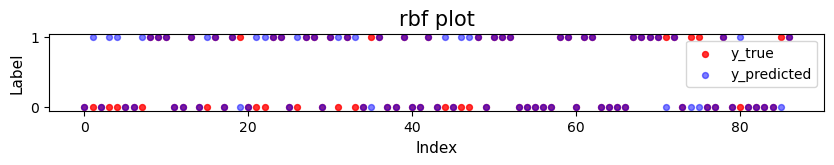

In [51]:
#predictions using rbf kernel
import matplotlib.pyplot as plt
x = range(len(y_test))
y_true = y_test
y_predicted = ryp 
plt.figure(figsize=(10,1), dpi=100)
plt.scatter(x, y_true, c='red', s=18, label='y_true',alpha = 0.8,marker = 'o')
plt.scatter(x, y_predicted, c='blue', s=18, label='y_predicted', alpha = 0.5, marker = 'o')
# plt.xticks(range(1,130,1))
plt.yticks(range(0,2,1))
plt.xlabel("Index", fontdict={'size': 11})
plt.ylabel("Label", fontdict={'size': 11})
plt.title("rbf plot", fontdict={'size': 15})
plt.legend(loc='best')
plt.show()

In [52]:
#confusion matrix,precision and recall of rbf
from sklearn.metrics import confusion_matrix
A = confusion_matrix(y_test,ryp)
precision = A[0][0]/(A[0][0] + A[1][0])
recall = A[0][0]/(A[0][0] + A[0][1])
print("Precision of rbf: ",precision)
print("Recall of rbf: ",recall)

Precision of rbf:  0.8604651162790697
Recall of rbf:  0.7254901960784313


D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods

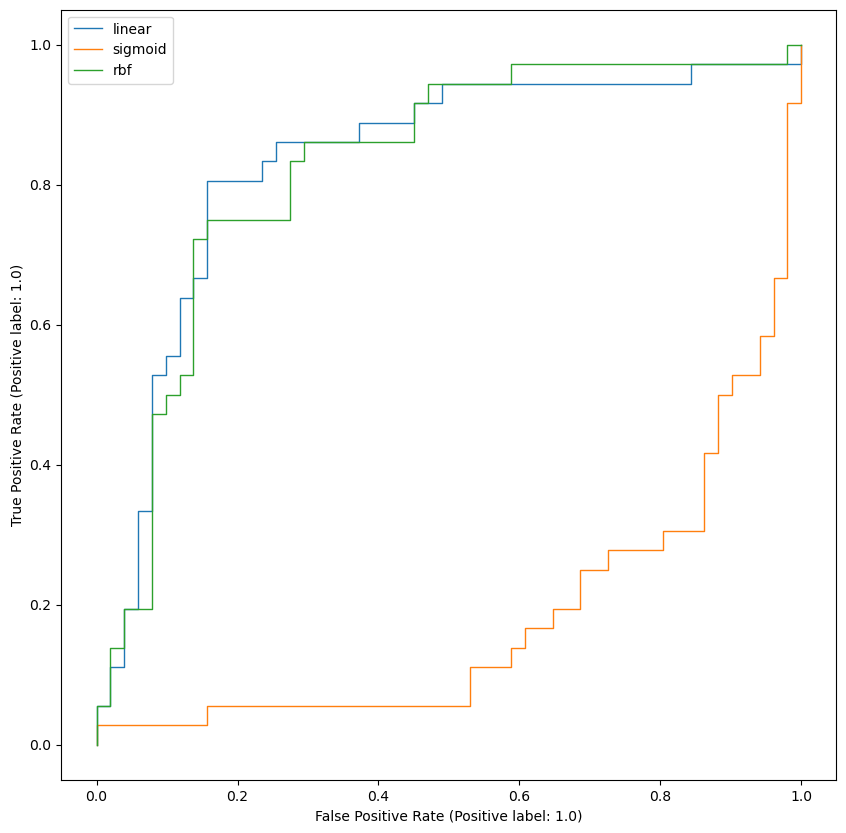

In [53]:
#ROC curves
fig,ax = plt.subplots(figsize=(10,10))
lsvm_roc = plot_roc_curve(estimator=lsvm, X=X_test, 
                        y=y_test, ax=ax, linewidth=1,label='linear')
ssvm_roc = plot_roc_curve(estimator=ssvm, X=X_test, 
                        y=y_test, ax=ax, linewidth=1,label='sigmoid')
rsvm_roc = plot_roc_curve(estimator=rsvm, X=X_test,
                        y=y_test, ax=ax, linewidth=1,label='rbf')
ax.legend(fontsize=10)

plt.show()

In [54]:
#predicting through threshold
from numpy import *
m1 = mean(X_human)
m2 = mean(X_GPT)
m = (m1 + m2)/2

X_prob = list(X_human) + list(X_GPT)
predicted_y = [None] * len(X_prob)
for i in range(len(X_prob)):
    if X_prob[i] > m:
        predicted_y[i] = 0
    else:
        predicted_y[i] = 1

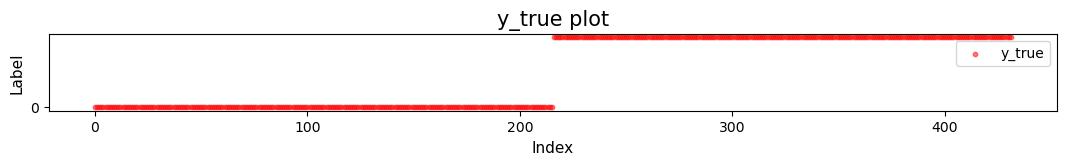

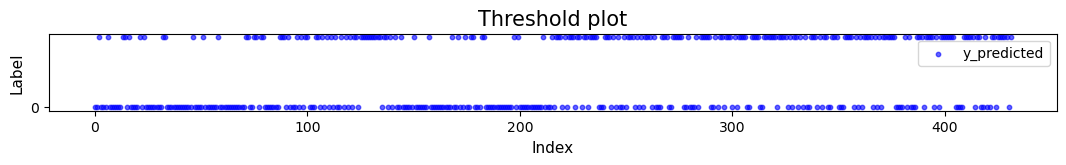

In [55]:
#predictions through threshold
y1 = list(np.zeros(len(X_human))) + list(np.ones(len(X_GPT)))
y2 = predicted_y
x = range(len(y1)) 

import matplotlib.pyplot as plt 
plt.figure(figsize=(13,1), dpi=100)
plt.scatter(x, y1, c='red', s=10, label='y_true',alpha = 0.5,marker = 'o')
plt.yticks(range(0,1,1))
plt.xlabel("Index", fontdict={'size': 11})
plt.ylabel("Label", fontdict={'size': 11})
plt.title("y_true plot", fontdict={'size': 15})
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(13,1), dpi=100)
plt.scatter(x, y2, c='blue', s=10, label='y_predicted', alpha = 0.6, marker = 'o')
plt.yticks(range(0,1,1))
plt.xlabel("Index", fontdict={'size': 11})
plt.ylabel("Label", fontdict={'size': 11})
plt.title("Threshold plot", fontdict={'size': 15})
plt.legend(loc='best')
plt.show()

In [56]:
#confusion matrix
from sklearn.metrics import confusion_matrix
A = confusion_matrix(y1,y2)
precision = A[0][0]/(A[0][0] + A[1][0])
print("Precision of threshold: ",precision)
print("Recall of threshold: ",recall)

Precision of threshold:  0.6508620689655172
Recall of threshold:  0.7254901960784313
